# Projeto Insights - Parte 5

## Questões
1. Crie uma nova coluna chamada 'dormitory_type'

* se o valor da coluna 'berdrooms' for igual a 1 -> studio 
* se o valor da coluna 'berdrooms' for igual a 2 -> apartament 
* se o valor da coluna 'berdrooms' > 2 -> house

2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos

3. Faça um gráfico de linhas que represente a média dos preços pelo ano da construção dos imóveis

4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios

5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930

6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitório dos imóveis

7. Crie um Dashboard com os gráficos das questões 02,03,04 (1 linha e 2 colunas)

8. Crie um Dashboard com os gráficos das questões 02 e 04 (2 colunas)

9. Crie um Dashboard com os gráficos das questões 03 e 5 (2 linhas)

### 0. Importando bibliotecas

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import gridspec

In [5]:
data = pd.read_csv('datasets/kc_house_data.csv')
pd.set_option('display.float_format', lambda x: '%.2f' % x) #definindo as casas decimais

### 1. Crie uma nova coluna chamada 'dormitory_type'
* se o valor da coluna 'berdrooms' for igual a 1 -> studio 
* se o valor da coluna 'berdrooms' for igual a 2 -> apartament 
* se o valor da coluna 'berdrooms' > 2 -> house

In [13]:
data['dormitory_type'] = data['bedrooms'].apply(lambda x: 'studio' if x == 1 else
                                                          'apartment' if x == 2 else
                                                          'house' if x > 2 else 'NA')   
data['dormitory_type'].head()

0        house
1        house
2    apartment
3        house
4        house
Name: dormitory_type, dtype: object

### 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos


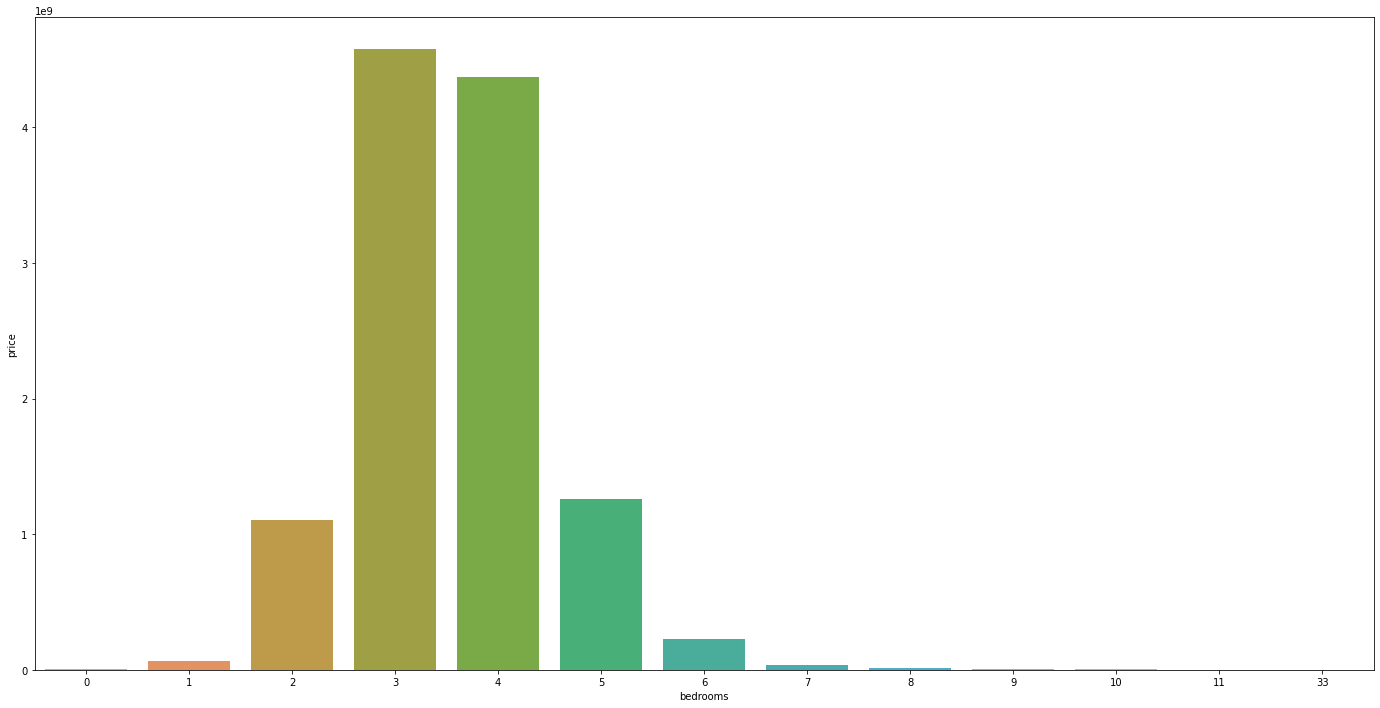

In [27]:
plt.figure(figsize=(24,12))
df = data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
sns.barplot(x='bedrooms',y='price', data=df);

### 3. Faça um gráfico de linhas que represente a média dos preços pelo ano da construção dos imóveis


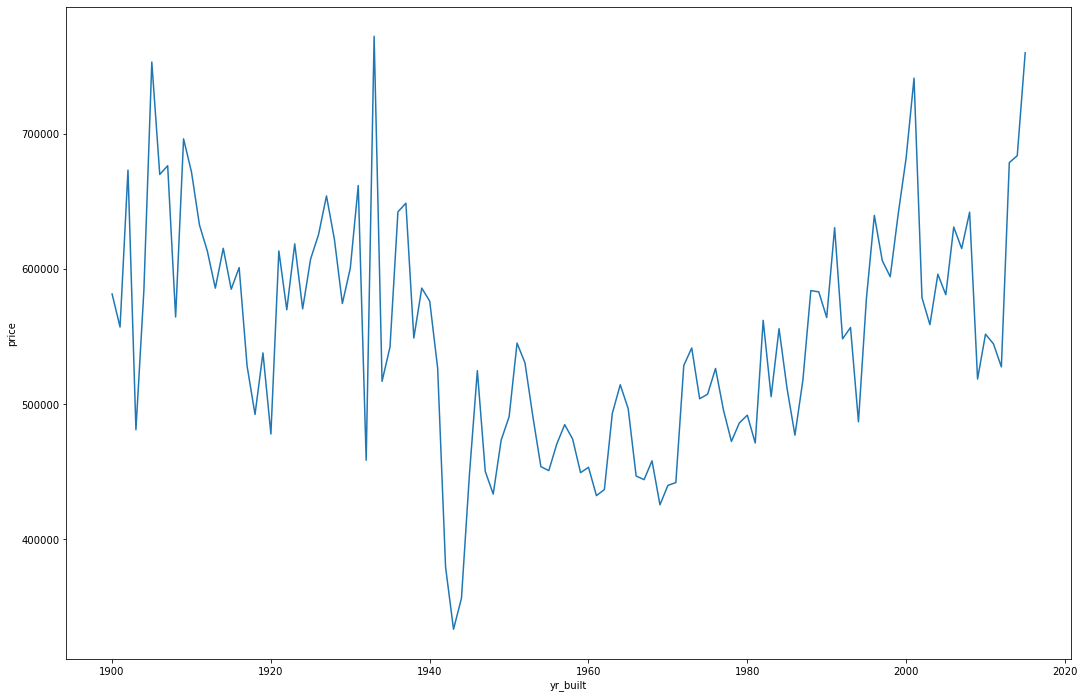

In [36]:
plt.figure(figsize=(18,12))
df_3 = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot(x='yr_built',y='price', data=df_3);

### 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios

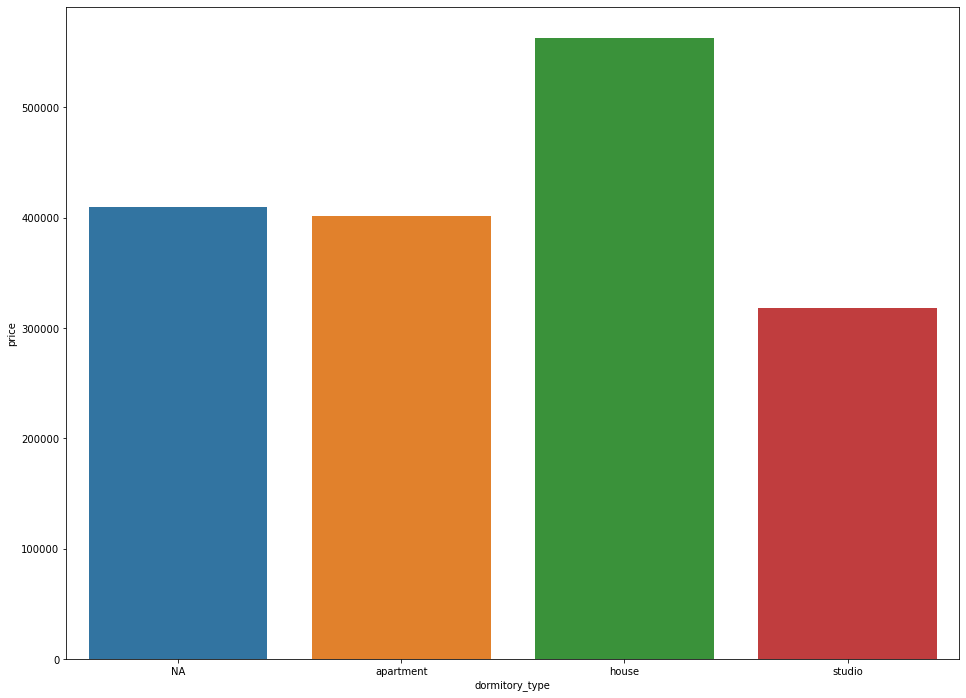

In [53]:
plt.figure(figsize=(16,12))
df_4 = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
sns.barplot(x='dormitory_type', y = 'price', data=df_4);

### 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930


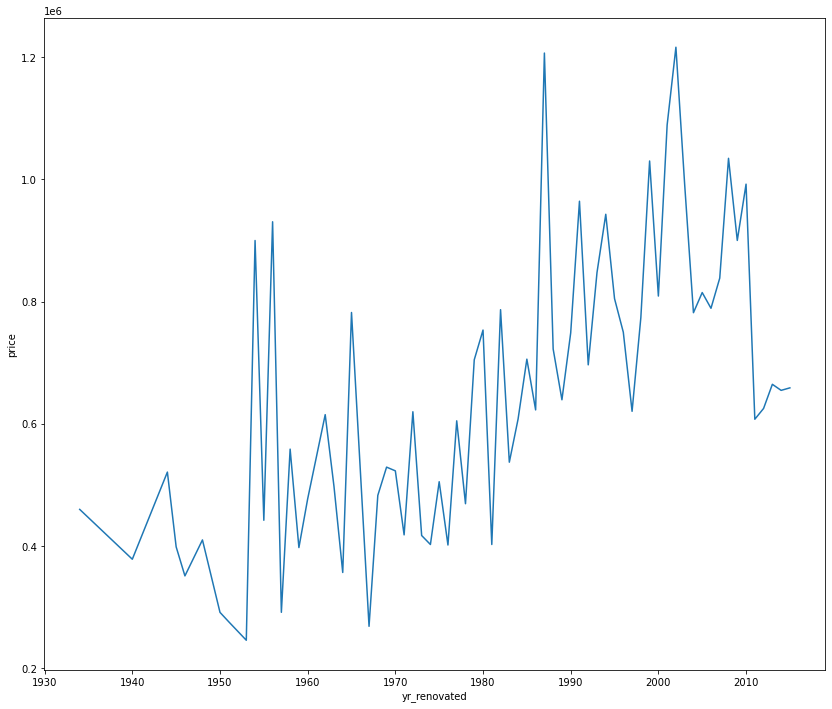

In [56]:
plt.figure(figsize=(14,12))
df_5 = data.loc[data['yr_renovated']>1929, ['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
sns.lineplot(x='yr_renovated', y = 'price', data=df_5);

### 6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitório dos imóveis


In [55]:
data[['price','yr_built','dormitory_type']].groupby(['yr_built','dormitory_type']).mean().reset_index()

,yr_built,dormitory_type,price
0,1900,apartment,589533.33
1,1900,house,584854.27
2,1900,studio,398944.00
3,1901,apartment,452856.40
4,1901,house,578619.17
...,...,...,...
309,2014,house,692687.72
310,2014,studio,516500.00
311,2015,apartment,543250.00
312,2015,house,797383.06


### 7. Crie um Dashboard com os gráficos das questões 02,03,04 (1 linha e 2 colunas)


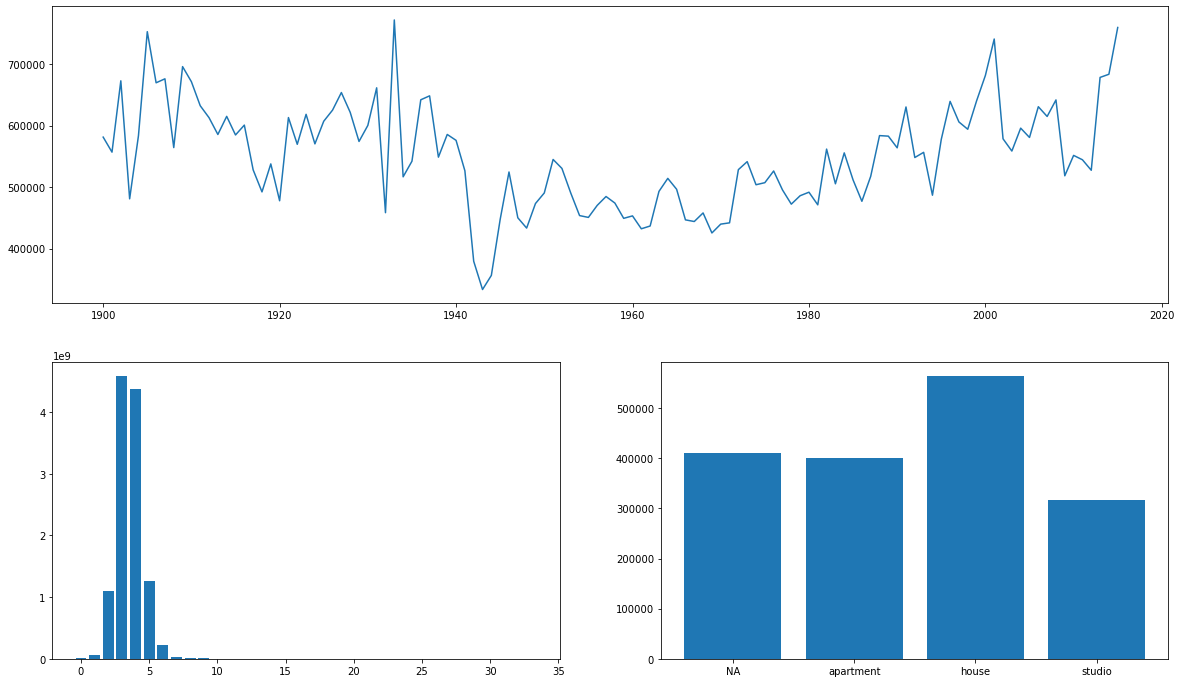

In [68]:
fig = plt.figure(figsize=(20,12))
specs = gridspec.GridSpec(ncols=2,nrows=2,figure=fig)

ax1 = fig.add_subplot(specs[0,:]) #refere-se ao gráfico da primeira linha
ax2 = fig.add_subplot(specs[1,0]) #refere-se ao gráfico da segunda linha, primeira coluna
ax3 = fig.add_subplot(specs[1,1]) #refere-se ao gráfico da segunda linha, segunda coluna


# Questão 3
df_3 = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot(df_3['yr_built'],df_3['price']);

# Questão 2
df_2 = data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
ax2.bar(df_2['bedrooms'],df_2['price']);

# Questão 4
df_4 = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax3.bar(df_4['dormitory_type'], df_4['price'], data=df_4);

### 8. Crie um Dashboard com os gráficos das questões 02 e 04 (2 colunas)


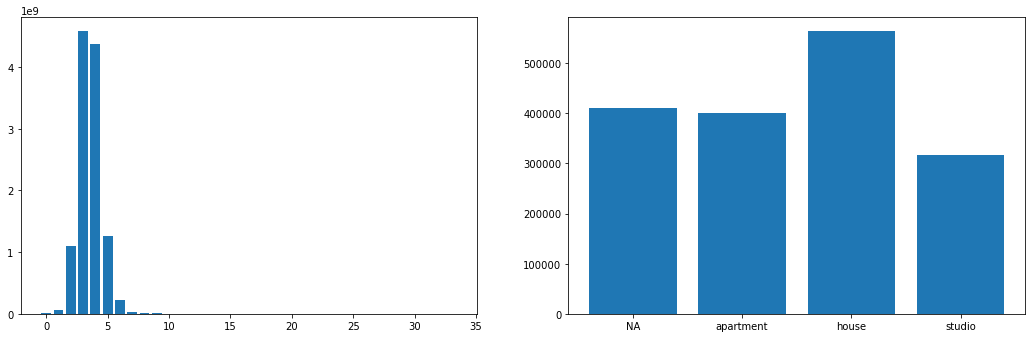

In [71]:
fig = plt.figure(figsize=(18,12))
specs = gridspec.GridSpec(ncols=2,nrows=2,figure=fig)

ax1 = fig.add_subplot(specs[0,0]) #refere-se ao gráfico da primeira coluna
ax2 = fig.add_subplot(specs[0,1]) #refere-se ao gráfico da segunda coluna

# Questão 2
df_2 = data[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(df_2['bedrooms'],df_2['price']);

# Questão 4
df_4 = data[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax2.bar(df_4['dormitory_type'], df_4['price'], data=df_4);

### 9. Crie um Dashboard com os gráficos das questões 03 e 5 (2 linhas)


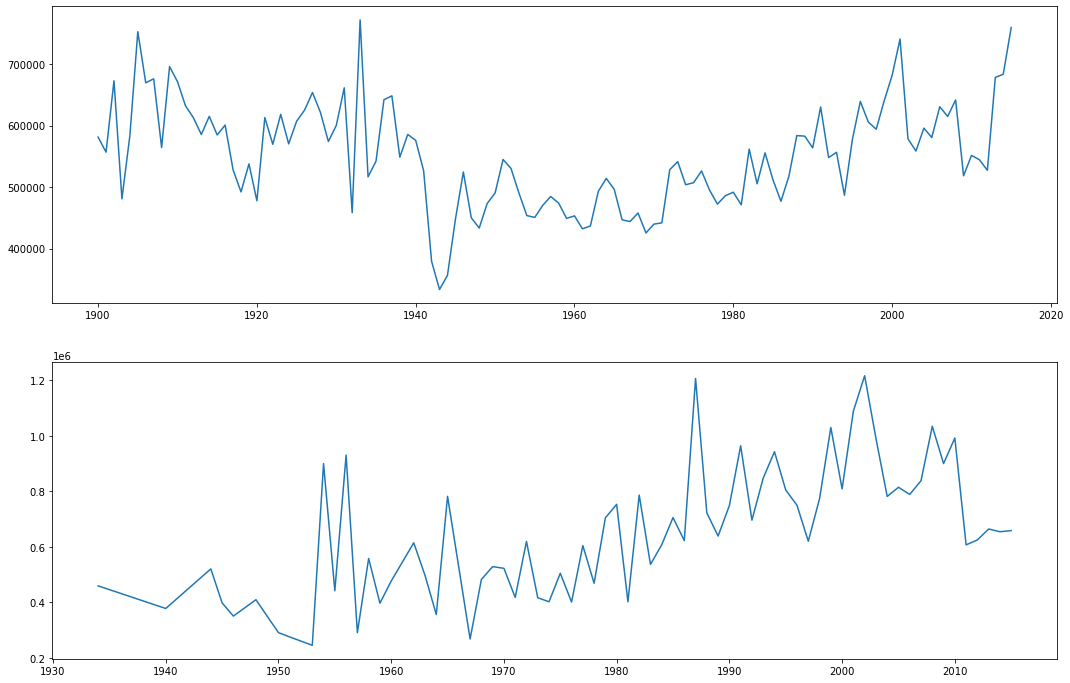

In [75]:
fig = plt.figure(figsize=(18,12))
specs = gridspec.GridSpec(ncols=1,nrows=2,figure=fig)

ax1 = fig.add_subplot(specs[0,0]) #refere-se ao gráfico da primeira linha
ax2 = fig.add_subplot(specs[1,0]) #refere-se ao gráfico da segunda linha

# Questão 3
df_3 = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot(df_3['yr_built'],df_3['price']);

# Questão 5

df_5 = data.loc[data['yr_renovated']>1929, ['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
ax2.plot(df_5['yr_renovated'], df_5['price']);